In [23]:
import os
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def change_dtype_ser(ser):
    
    if ser.dtype == int:
        return ser.astype(np.int32)
    
    if ser.dtype == float:
        return ser.astype(np.float32)
    
    if ser.dtype == np.object:
        return ser.astype("category")
    
    return ser
    

def change_dtype_df(df):
    """
    change types of columns to reduce memory size
    :param df: dataframe
    :return df: dataframe
    """
    df["fecha_dato"] = pd.to_datetime(df["fecha_dato"])
    df["fecha_alta"] = pd.to_datetime(df["fecha_alta"])
    
    memory = df.memory_usage().sum() / 10**6
    print("Memory usage before changing types %0.2f MB" % memory)

    for col in df.columns:
        df[col] = change_dtype_ser(df[col])

    memory = df.memory_usage().sum() / 10 ** 6
    print("Memory usage after changing types %0.2f MB" % memory)
    return df


def load_csv(filename):
    df = pd.read_csv(filename)
    df = change_dtype_df(df)
    return df

In [3]:
INP_DIR = "data/data_/"

In [4]:
df_train = load_csv(os.path.join(INP_DIR, "train_cleaned.csv"))

/home/hai/opt/anaconda3-2020.02/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Memory usage before changing types 6946.48 MB
Memory usage after changing types 3302.66 MB


In [5]:
df_train.shape

(13647309, 68)

In [6]:
df_train.isnull().sum().sum()

0

In [7]:
df_train.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'cod_prov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1',
       'ind_ahor_fin_ult1_just_purchased', 'ind_aval_fin_ult1_just_purchased',
       'ind_cco_fin_ult1_just_purchased', 'ind_cder_fin_ult1_just_purchased',

In [11]:
PROD_COLS = [col for col in df_train.columns if re.match(r"^ind_.*_ult1$", col)]
print(len(PROD_COLS))
print(PROD_COLS)

24
['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


In [12]:
NEW_PURCH_COLS = [col for col in df_train.columns if re.match(r"^ind_.*_ult1_just_purchased$", col)]
print(len(NEW_PURCH_COLS))
print(NEW_PURCH_COLS)

24
['ind_ahor_fin_ult1_just_purchased', 'ind_aval_fin_ult1_just_purchased', 'ind_cco_fin_ult1_just_purchased', 'ind_cder_fin_ult1_just_purchased', 'ind_cno_fin_ult1_just_purchased', 'ind_ctju_fin_ult1_just_purchased', 'ind_ctma_fin_ult1_just_purchased', 'ind_ctop_fin_ult1_just_purchased', 'ind_ctpp_fin_ult1_just_purchased', 'ind_deco_fin_ult1_just_purchased', 'ind_deme_fin_ult1_just_purchased', 'ind_dela_fin_ult1_just_purchased', 'ind_ecue_fin_ult1_just_purchased', 'ind_fond_fin_ult1_just_purchased', 'ind_hip_fin_ult1_just_purchased', 'ind_plan_fin_ult1_just_purchased', 'ind_pres_fin_ult1_just_purchased', 'ind_reca_fin_ult1_just_purchased', 'ind_tjcr_fin_ult1_just_purchased', 'ind_valo_fin_ult1_just_purchased', 'ind_viv_fin_ult1_just_purchased', 'ind_nomina_ult1_just_purchased', 'ind_nom_pens_ult1_just_purchased', 'ind_recibo_ult1_just_purchased']


# Product popularity

Text(0, 0.5, 'Product')

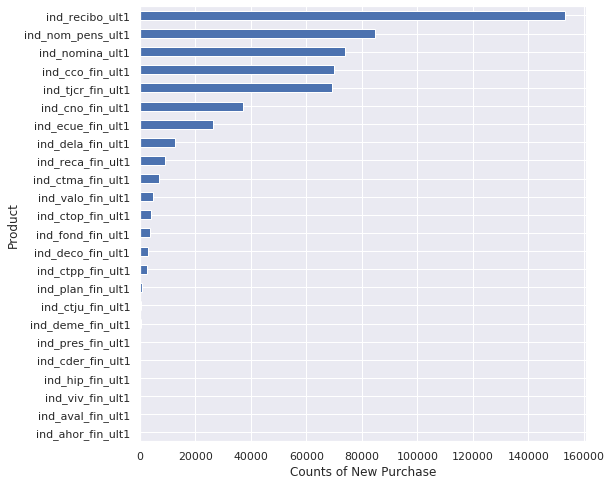

In [28]:
prod_popul = df_train[NEW_PURCH_COLS].sum(axis=0)
prod_popul.index = [idx.replace("_just_purchased", "") for idx in prod_popul.index]
prod_popul = prod_popul.sort_values()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
prod_popul.plot(kind="barh", ax=ax)
ax.set_xlabel("Counts of New Purchase")
ax.set_ylabel("Product")